In [2]:
install.packages("GPFDA")

also installing the dependencies ‘dotCall64’, ‘fda.usc’, ‘spam’, ‘fda’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Loading required package: fda.usc
Loading required package: fda
Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot

Loading required package: MASS
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-22. For overview type 'help("mgcv-package")'.
Loading required package: rpart
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-0 (2018-06-19) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following object is masked from ‘package:Matrix’:

    det

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve




     title: -likelihood:     pow.ex.v     pow.ex.w     vv     
  0:     1619.4929: 0.00626474 -0.000783264 0.500000
  2:     1366.7042: 0.863675 -0.672418  1.64859
  4:     1359.3632:  1.06605 -1.19283  1.64779
  6:     1343.2176:  1.37834 -2.88001  1.51914
  8:     1341.2736:  1.81709 -3.62456  1.52581
 10:     1339.6979:  2.35834 -4.34213  1.47510
 12:     1339.3131:  2.57608 -4.44054  1.52031
 14:     1339.2905:  2.70447 -4.45718  1.51816
 16:     1339.2905:  2.70666 -4.45800  1.51812

     optimization finished. 


   user  system elapsed 
 18.081   0.736  18.288 

   user  system elapsed 
  0.605   0.042   0.505 


     title: -likelihood:     rat.qu.w     rat.qu.s     rat.qu.a     vv     
  0:     1804.7959: 0.000438691 0.420686 0.412841 0.200000
  2:     1782.9536: 0.100888 0.420671 -0.707583 0.203503
  4:     1781.9022: 0.106590 0.420657 -0.801156 0.204304
  6:     1781.6508: 0.108093 0.420653 -0.824544 0.204532
  8:     1781.5884: 0.108474 0.420652 -0.830391 0.204591
 10:     1781.5729: 0.108570 0.420652 -0.831853 0.204606
 12:     1781.5690: 0.108594 0.420652 -0.832218 0.204610
 14:     1781.5680: 0.108600 0.420652 -0.832309 0.204610
 16:     1781.5678: 0.108601 0.420652 -0.832332 0.204611
 18:     1781.5677: 0.108602 0.420652 -0.832338 0.204611
 20:     1781.5677: 0.108602 0.420652 -0.832339 0.204611
 22:     1781.5677: 0.108602 0.420652 -0.832340 0.204611
 24:     1781.5677: 0.108602 0.420652 -0.832340 0.204611
 26:     1781.5677: 0.108602 0.420652 -0.832340 0.204611
 28:     1781.5677: 0.108602 0.420652 -0.832340 0.204611
 30:     1781.5677: 0.108602 0.420652 -0.832340 0.204611
 32:     

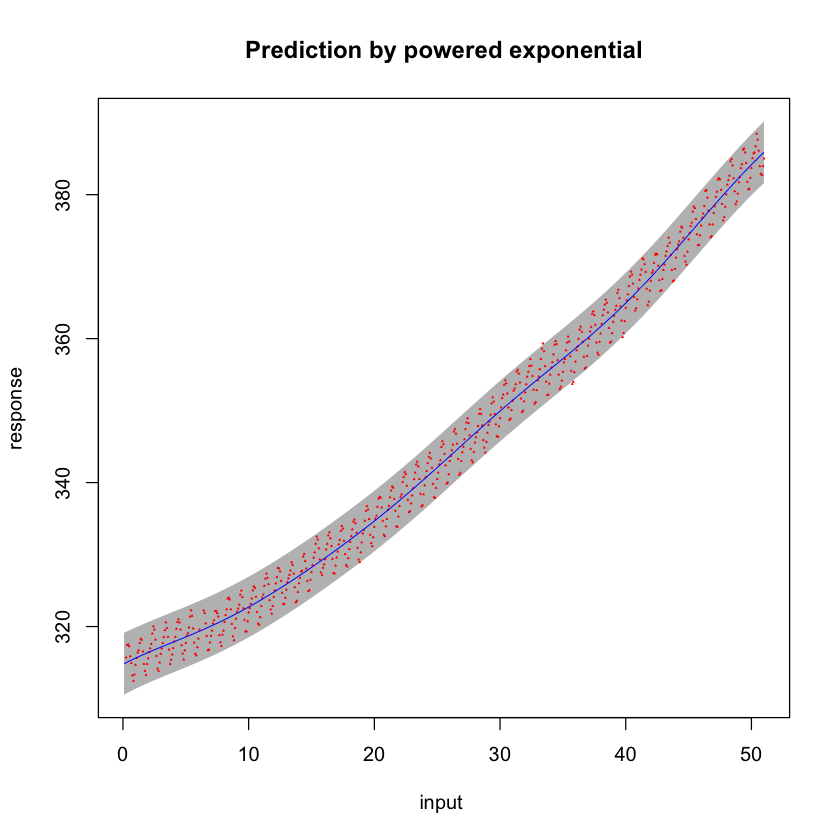


     title: -likelihood:     pow.ex.v     pow.ex.w     rat.qu.w     rat.qu.s     rat.qu.a     vv     custom.w     custom.u     custom.v     


ERROR: Error in get(paste0("DCov.", name.Dp)): object 'DCov.custom.u' not found


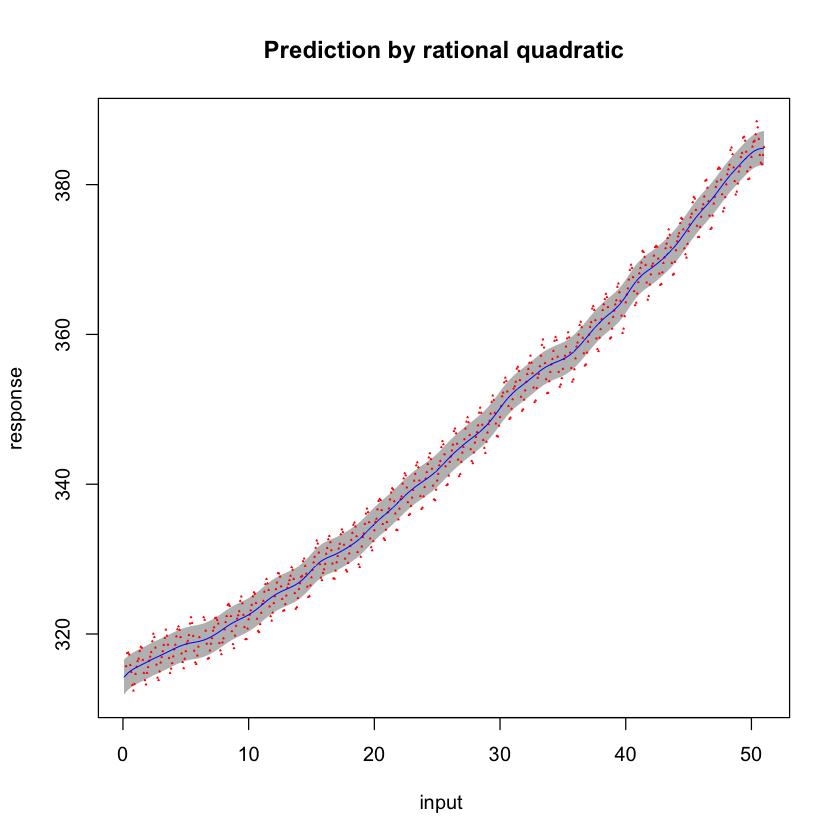

In [3]:
library(GPFDA)
data(co2)
data_co2=co2
# store data into matrix and remove missing values
y=data.matrix(data_co2[,!names(data_co2)%in%'Annual_Average'])
y=matrix(t(y),ncol=1)
y=matrix(t(y),ncol=1)
x=1:612/12; x[y<0]=NA
mat=cbind(y,x)
mat=na.omit(mat)
X=as.matrix(mat[,2])
Y=as.matrix(mat[,1])
x=as.matrix(seq(1,612,len=1000)/12)
# First covariance matrix
system.time(a1 <- gpr(as.matrix(X),as.matrix(Y),c('pow.ex'),mean='t',trace=2))
system.time(b1 <- gppredict(a1,Data.new=as.matrix(x)))
# plot(a1)
# plot(b1)
upper=b1$pred.mean+1.96*b1$pred.sd;
lower=b1$pred.mean-1.96*b1$pred.sd;
plot(-100,-100,col=0,xlim=range(X,x),ylim=range(upper,lower,Y),main="Prediction by powered exponential", xlab="input ",ylab="response")
polygon(c(x, rev(x)), c(upper, rev(lower)),col = "grey", border = NA)
points(X,Y,pch=2,col=2,cex=0.1)
# lines(X[,1],Y)
lines(x,b1$pred.mean,col=4,lwd=0.8)
# Second covariance matrix
a2 <- gpr(as.matrix(X),as.matrix(Y),c('rat.qu'),mean='t',trace=2)
b2 <- gppredict(a2,Data.new=as.matrix(x))
# plot(a2)
# plot(b2)
upper=b2$pred.mean+1.96*b2$pred.sd;
lower=b2$pred.mean-1.96*b2$pred.sd;
plot(-100,-100,col=0,xlim=range(X,x),ylim=range(upper,lower,Y),main="Prediction by rational quadratic", xlab="input ",ylab="response")
 polygon(c(x, rev(x)), c(upper, rev(lower)),col = "grey", border = NA)
 points(X,Y,pch=2,col=2,cex=0.1)
 # lines(X[,1],Y)
 lines(x,b2$pred.mean,col=4,lwd=0.8)
 
 ## Define the customized covariance matrix 
 cov.custom=function(hyper,Data,Data.new=NULL){
    hyper=lapply(hyper,exp);
    datadim=dim(Data)
    if(is.null(Data.new)) Data.new=Data
    A1=xixj_sta(Data,Data.new,hyper$custom.w) #exp(w)*||x-x'||^2
    mdim=dim(Data);mdim.new=dim(Data.new)
    cov.=sapply(1:mdim[1],function(i) matrix(rep(Data[i,],mdim.new[1]),nrow=mdim.new[1],byrow=T)-Data.new)
    cov..=matrix(0,ncol=mdim[1],nrow=mdim.new[1])
    if(mdim[2]>1){
      for(i in 1:(mdim[2]-1)){
        cov..=cov..+cov.[1:mdim.new[1],];cov.=cov.[-(1:mdim.new[1]),]}
      cov.= cov..+cov.   # x-x'
      }
    A2=hyper$custom.u*(sin(pi*cov.))^2
    return(hyper$custom.v*exp(-A1-A2))
 }
 
# Define the first derivative of the customized covariance matrix 
DCov.custom.w=function(hyper,data,AlphaQ){
  Dcov=cov.custom(hyper,data)
  A1=-xixj_sta(data,data,hyper$custom.w)
  out=Dcov %*% A1
  out=sum(out*AlphaQ)
  return(out)
}

# Define the second derivative of the customized covariance matrix 
D2custom.w=function(hyper,data,inv.Q,Alpha.Q){
  Dcov=cov.custom(hyper,data)
  A1=-xixj_sta(data,data,hyper$custom.w)
  wD2=Dcov%*%(A1^2+A1)
  wD1=Dcov%*%A1
  D2c.w=D2(wD1,wD2,inv.Q,Alpha.Q)
  return(D2c.w)
}

D2custom.w=function(hyper,data,inv.Q,Alpha.Q){
  Dcov=cov.custom(hyper,data)
  A1=-xixj_sta(data,data,hyper$custom.w)
  wD2=Dcov%*%(A1^2+A1)
  wD1=Dcov%*%A1
  D2c.w=D2(wD1,wD2,inv.Q,Alpha.Q)
  return(D2c.w)
}

D2custom.u=function(hyper,data,inv.Q,Alpha.Q){
  Dcov=cov.custom(hyper,data)
  hyper=lapply(hyper,exp)
  mdim=dim(data);mdim.new=mdim
  cov.=sapply(1:mdim[1],function(i) matrix(rep(data[i,],mdim.new[1]),nrow=mdim.new[1],byrow=T)-data)
  cov..=matrix(0,ncol=mdim[1],nrow=mdim.new[1])
  if(mdim[2]>1){
    for(i in 1:(mdim[2]-1)){
      cov..=cov..+cov.[1:mdim.new[1],];cov.=cov.[-(1:mdim.new[1]),]}
    cov.=cov..+cov.
    }
  A2=-hyper$custom.u*(sin(pi*cov.))^2  
  uD2=Dcov%*%(A2^2+A2)
  uD1=Dcov%*%A2
  D2c.u=D2(uD1,uD2,inv.Q,Alpha.Q)
  return(D2c.u)
}

D2custom.v=function(hyper,data,inv.Q,Alpha.Q){
  vD1=cov.custom(hyper,data)
  vD2=vD1
  D2c.v=D2(vD1,vD2,inv.Q,Alpha.Q)
  return(D2c.v)
}

# Define the diagonal of the customized covariance matrix 
diag.custom=function(hyper,data){
  Qstar=rep(exp(hyper$custom.v),dim(data)[1])
  return(Qstar)
}

# Use all three covariance matrix
a3 <- gpr(as.matrix(X),as.matrix(Y),Cov=c('pow.ex','custom','rat.qu'),
          NewHyper=c('custom.w','custom.u','custom.v'),mean='t',trace=2)

b3 <- gppredict(a3,Data.new=as.matrix(x))
# plot(a3)
# plot(b3)

upper=b3$pred.mean+1.96*b3$pred.sd;
lower=b3$pred.mean-1.96*b3$pred.sd;
plot(-100,-100,col=0,xlim=range(X,x),ylim=range(upper,lower,Y),main="Prediction by sum of three kernels", xlab="input ",ylab="response")
polygon(c(x, rev(x)), c(upper, rev(lower)),col = "grey", border = NA)
points(X,Y,pch=2,col=2,cex=0.1)
# lines(X[,1],Y)
lines(x,b3$pred.mean,col=4,lwd=0.8)
plot(a1)
plot(b1)